In [1]:
##### Import needed Libraries #####

import numpy as np
import pandas as pd
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

print('Libraries Imported')

Libraries Imported


In [2]:
##### Read Manual Connections #####

dfm = pd.read_csv("../RBP_Manual.csv")
print(dfm)



   component_synonym         chembl_id            synonyms  \
0              TRBP2       jm1c00018_1                 NaN   
1              TRBP2       jm1c00018_2                 NaN   
2              TRBP2       jm1c00018_3                 NaN   
3              TRBP2       jm1c00018_4                 NaN   
4              TRBP2       jm1c00018_5                 NaN   
5              TRBP2       jm1c00018_6                 NaN   
6              TRBP2       jm1c00018_7                 NaN   
7              TRBP2       jm1c00018_8                 NaN   
8              TRBP2       jm1c00018_9                 NaN   
9              TRBP2      jm1c00018_10                 NaN   
10             TRBP2      jm1c00018_11                 NaN   
11             TRBP2      jm1c00018_12                 NaN   
12             TRBP2      jm1c00018_13                 NaN   
13             TRBP2      jm1c00018_14                 NaN   
14             TRBP2      jm1c00018_15                 NaN   
15      

In [3]:
##### Reformat Manual Data Frame #####

dfm['syn_type'] = ''
dfm['molecule_type'] = 'Small Molecule'
dfm['CHEMBL_Target'] = ''
dfm['ChemBL_Assay'] = ''
dfm['assay_id'] = ''
dfm['description'] = ''
dfm['standard_value'] = ''
dfm['standard_units'] = ''

dfm['max_phase'].fillna(0, inplace=True)

# Assign Assays and Targets #
l = len(dfm)
t = []
for i in range(0,l):
    tt = dfm['component_synonym'][i]
    if tt not in t:
        #print(tt)
        t.append(tt)
    
print(t)

for i in range(0,l):
    tt = dfm['component_synonym'][i]
    tx = t.index(tt)
    #print(tt, tx)
    dfm['CHEMBL_Target'][i] = 'Target_'+str(tx)
    dfm['ChemBL_Assay'][i] = 'Assay_'+str(tx)
    dfm['assay_id'][i] = 'Assay_'+str(tx)
    dfm['description'][i] = 'Assay for '+dfm['pref_name'][i] 
    
# Print Data Frame #
#dfm = dfm[['component_synonym','chembl_id','synonyms','syn_type', 'molecule_type','max_phase','canonical_smiles','CHEMBL_Target','pref_name','assay_id','ChemBL_Assay','description','standard_value','standard_units']]
print(dfm)

['TRBP2', 'SMN2', 'PAPD5']
   component_synonym         chembl_id            synonyms  \
0              TRBP2       jm1c00018_1                 NaN   
1              TRBP2       jm1c00018_2                 NaN   
2              TRBP2       jm1c00018_3                 NaN   
3              TRBP2       jm1c00018_4                 NaN   
4              TRBP2       jm1c00018_5                 NaN   
5              TRBP2       jm1c00018_6                 NaN   
6              TRBP2       jm1c00018_7                 NaN   
7              TRBP2       jm1c00018_8                 NaN   
8              TRBP2       jm1c00018_9                 NaN   
9              TRBP2      jm1c00018_10                 NaN   
10             TRBP2      jm1c00018_11                 NaN   
11             TRBP2      jm1c00018_12                 NaN   
12             TRBP2      jm1c00018_13                 NaN   
13             TRBP2      jm1c00018_14                 NaN   
14             TRBP2      jm1c00018_15     

/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/peter/anaconda3/envs/rdkit/lib/python3.7

In [4]:
##### Read ChemBL Connections #####

df = pd.read_csv("../Chembl_RBP.csv")


#print(df.columns)
dfm = dfm[df.columns]
#print(dfm.columns)
#print(dfm)


# Create ChemBL Target List #
dfp = df[['component_synonym', 'CHEMBL_Target']]

#print(dfp)

lp = []
lc = []
l = len(dfp)
#print(lp,lc,l)
for i in range(0,l):
    p = dfp['component_synonym'][i]
    c = dfp['CHEMBL_Target'][i]
    #print(p,c)
    if p not in lp and c not in lc:
        lp.append(p)
        lc.append(c)
        #print(i)
        #print(p,c)
        
#print(lp,lc)

l = len(dfm)
for i in range(0,l):
    p = dfm['component_synonym'][i]
    #print(p)
    if p in lp:
        pi = lp.index(p)
        #print(p, pi, lc[pi])
        dfm['CHEMBL_Target'][i] = lc[pi]

print(dfm)
print()
df = pd.concat([df, dfm], axis=0, ignore_index = True)

print(df)

   component_synonym         chembl_id            synonyms syn_type  \
0              TRBP2       jm1c00018_1                 NaN            
1              TRBP2       jm1c00018_2                 NaN            
2              TRBP2       jm1c00018_3                 NaN            
3              TRBP2       jm1c00018_4                 NaN            
4              TRBP2       jm1c00018_5                 NaN            
5              TRBP2       jm1c00018_6                 NaN            
6              TRBP2       jm1c00018_7                 NaN            
7              TRBP2       jm1c00018_8                 NaN            
8              TRBP2       jm1c00018_9                 NaN            
9              TRBP2      jm1c00018_10                 NaN            
10             TRBP2      jm1c00018_11                 NaN            
11             TRBP2      jm1c00018_12                 NaN            
12             TRBP2      jm1c00018_13                 NaN            
13    

/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
mollist = df['canonical_smiles']
print(mollist)

0       C[C@H]1C[C@@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[...
1       C[C@H]1C[C@@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[...
2       C[C@H]1C[C@@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[...
3       CC(=O)O[C@@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H...
4       CC(=O)O[C@H]1C[C@@]2(C)[C@@H](C[C@@H]3O[C@]4(C...
                              ...                        
2953    O=C(OC)C1=C(C2=CC=C(N(C(CCCCCNC(CCCC[C@@H]3SC[...
2954    CC1(C)CC(Oc2ccc(-c3ccc(-c4cn[nH]c4)cc3O)nn2)CC...
2955    OC1=CC(C2=CNN=C2)=CC=C1C3=NN=C(N(C)C4CC(C)(C)N...
2956    O=C(C1=C(NC2=CC=CC=C2C(O)=O)C3=CC(OC(F)(F)F)=C...
2957    COCCCOc1cc2c(cc1OC)-c1cc(=O)c(C(=O)O)cn1[C@H](...
Name: canonical_smiles, Length: 2958, dtype: object


In [6]:
mol =[]
qed =[]
for i in mollist:
    #print(i)
    mt = Chem.MolFromSmiles(i)
    qed.append(Chem.QED.default(mt))
    mol.append(mt)
    
#Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)
#print(qed)
df['qed'] = qed
print(df)

     component_synonym         chembl_id                         synonyms  \
0                Eif4a     CHEMBL1098427                    Hippuristanol   
1                Eif4a     CHEMBL1098427                    Hippuristanol   
2                Eif4a     CHEMBL1098427                    Hippuristanol   
3                Eif4a     CHEMBL1221460       Epihippuristanol 3-Acetate   
4                Eif4a     CHEMBL1221461  Epihippuristanol 3,11-Diacetate   
...                ...               ...                              ...   
2953             TRBP2      jm1c00018_21                              NaN   
2954              SMN2     CHEMBL4290141               LMI070 (BRANAPLAM)   
2955              SMN2    nchembio1837_1                          NVS-SM2   
2956             PAPD5  jstem202003016_1                           BCH001   
2957             PAPD5     CHEMBL4283853                           RG7834   

     syn_type   molecule_type  max_phase  \
0       OTHER  Small molecule  

In [7]:
### Prepare Nodes ###

#print(df)
#print
chemlist = df[['chembl_id','synonyms','canonical_smiles','max_phase','qed']]
#print(chemlist)
protlist = df[['CHEMBL_Target', 'component_synonym','pref_name']]
#print(protlist)
asslist = df[['ChemBL_Assay', 'assay_id', 'description']]
#print(asslist)

# unify Compound List
records = chemlist.to_records(index=False)
result = list(records)
#print(result)

comps = []
for i in result:
    #print(i[1], type(i[1]))
    
    if type(i[1]) == float:
        i[1] = ''
        #print('Convert :', i[1])
    
    if i not in comps:
        comps.append(i)

#print(compounds)
print(len(comps))
#print

compounds = []
cochem = []
codesc = {}

for i in comps:
    #print(i)
    
    if i[0] not in cochem:
        cochem.append(i[0])
        codesc[i[0]] = i[1]
        compounds.append(i)
    else:
        codesc[i[0]] = codesc[i[0]]+'/'+i[1]
        
#print(len(compounds))
#for i in compounds:
#    print(i)

#for k,v in codesc.items():
#    print(k, v)
    


# unify Protein List
records = protlist.to_records(index=False)
result = list(records)
#print(result)

proteins = []
for i in result:
    #print(i)
    if i not in proteins:
        proteins.append(i)

#print(proteins)
#print(len(proteins))
#print

# unify Assay List
records = asslist.to_records(index=False)
result = list(records)
#print(result)

assays = []
for i in result:
    #print(i)
    if i not in assays:
        assays.append(i)

#print(assays)
#print(len(assays))


comind = []
for i in compounds:
    comind.append(i[0])

dfc = pd.DataFrame.from_records(compounds, columns =['ChemblID', 'Name', 'Smiles', 'Phase', 'QED'], index = comind)
dfp = pd.DataFrame.from_records(proteins, columns =['ChemblID', 'Name', 'Description'])
dfa = pd.DataFrame.from_records(assays, columns =['ChemblID', 'Name', 'Description'])

dfc['Type'] = 'Small Molecule'
#dfc['Name'] = ''
dfc['Description'] = ''
for k,v in codesc.items():
    if v != '':
        print(k, v)
        dfc.at[k, 'Description'] = v
        l = dfc.loc[k]
        #print(l)

dfc = dfc[['ChemblID', 'Name', 'Description', 'Type', 'Phase', 'QED','Smiles']]

dfp['Type'] = 'Protein'
dfp['Phase'] = 100
dfp['QED'] = -1

dfa['Type'] = 'Assay'
dfa['Phase'] = 200
dfa['QED'] = -2

dfc = dfc[['ChemblID', 'Name', 'Description', 'Type', 'Phase', 'QED','Smiles']]

#print(dfp)
#print(dfa)
print(dfc)

dfno = pd.concat([dfc, dfp, dfa], axis=0)
print(dfno)

1410
CHEMBL1098427 Hippuristanol
CHEMBL1221460 Epihippuristanol 3-Acetate
CHEMBL1221461 Epihippuristanol 3,11-Diacetate
CHEMBL1221463 Epihippuristanol 11-One
CHEMBL1221464 Epihippuristanol 3,11-Dione
CHEMBL1222308 Hippuristanol 3-Acetate
CHEMBL1222309 Hippuristanol 3,11-Diacetate
CHEMBL1222374 Hippuristanol 11-One
CHEMBL1222375 Hippuristanol 3,11-Dione
CHEMBL1651036 2''-Episilvestrol
CHEMBL394528 Aglafolin/Methyl Rocaglate
CHEMBL438139 Rocaglamide
CHEMBL449854 Hippurin-1
CHEMBL458245 22-Epi-Hippuristanol/Epihippuristanol
CHEMBL504093 Hippuristanohemiacetal
CHEMBL508041 Epihippurin 1
CHEMBL857 Bioepiderm/Biotin/Biotin 100/MD-1003/NSC-63865/Vitamin H
CHEMBL2058178 (+)-N-Methoxy Rocaglamide
CHEMBL518601 Rocagloic Acid
CHEMBL555196 (-)-Silvestrol/Silvestrol
CHEMBL1873475 CRA-032765/Ibrutinib/Imbruvica/PC-32765/PCI 32765/PCI-32765/PCI-32765-00
CHEMBL413 AY-22989/L04AA10/NSC-226080/Rapamune/Rapamycin/Sirolimus/SM-88 COMPONENT SIROLIMUS/WY-090217
CHEMBL1240971 Okicenone
CHEMBL1242196 Dehydrom

In [8]:
dfno.to_csv('../Chembl_RBP_Nodes.csv', index=False)

In [9]:
# Preparing Edges #
#print(df)

ca = df[['chembl_id', 'ChemBL_Assay']]
at = df[['CHEMBL_Target', 'ChemBL_Assay']]

# unify Compound-Assay List
records = ca.to_records(index=False)
result = list(records)
#print(result)

compass = []
for i in result:
    #print(i)
    if i not in compass:
        compass.append(i)

print(compass)
print(len(compass))

# unify Compound-Assay List
records = at.to_records(index=False)
result = list(records)
#print(result)

targass = []
for i in result:
    #print(i)
    if i not in targass:
        targass.append(i)

print(targass)
print(len(targass))


[('CHEMBL1098427', 'CHEMBL1226418'), ('CHEMBL1098427', 'CHEMBL1226429'), ('CHEMBL1098427', 'CHEMBL1226436'), ('CHEMBL1221460', 'CHEMBL1226418'), ('CHEMBL1221461', 'CHEMBL1226418'), ('CHEMBL1221463', 'CHEMBL1226418'), ('CHEMBL1221464', 'CHEMBL1226418'), ('CHEMBL1221511', 'CHEMBL1226418'), ('CHEMBL1222308', 'CHEMBL1226418'), ('CHEMBL1222309', 'CHEMBL1226418'), ('CHEMBL1222374', 'CHEMBL1226418'), ('CHEMBL1222375', 'CHEMBL1226418'), ('CHEMBL1222376', 'CHEMBL1226418'), ('CHEMBL1222377', 'CHEMBL1226418'), ('CHEMBL1651036', 'CHEMBL3757994'), ('CHEMBL3752463', 'CHEMBL3757994'), ('CHEMBL3752463', 'CHEMBL3755804'), ('CHEMBL3753154', 'CHEMBL3757994'), ('CHEMBL3753154', 'CHEMBL3755804'), ('CHEMBL394528', 'CHEMBL3757994'), ('CHEMBL438139', 'CHEMBL3757994'), ('CHEMBL449854', 'CHEMBL1226418'), ('CHEMBL457151', 'CHEMBL1226418'), ('CHEMBL458245', 'CHEMBL1226418'), ('CHEMBL504093', 'CHEMBL1226418'), ('CHEMBL506697', 'CHEMBL1226418'), ('CHEMBL507260', 'CHEMBL1226418'), ('CHEMBL508041', 'CHEMBL1226418'), 

[('CHEMBL3309046', 'CHEMBL1226418'), ('CHEMBL3309046', 'CHEMBL1226429'), ('CHEMBL3309046', 'CHEMBL1226436'), ('CHEMBL3309046', 'CHEMBL3757994'), ('CHEMBL3309046', 'CHEMBL3755804'), ('CHEMBL2052028', 'CHEMBL1226423'), ('CHEMBL2052028', 'CHEMBL1226426'), ('CHEMBL2052028', 'CHEMBL1226427'), ('CHEMBL2052028', 'CHEMBL1226437'), ('CHEMBL2052028', 'CHEMBL1226439'), ('CHEMBL2052028', 'CHEMBL1226442'), ('CHEMBL2052028', 'CHEMBL1226444'), ('CHEMBL2052028', 'CHEMBL4007296'), ('CHEMBL2052028', 'CHEMBL4044796'), ('CHEMBL2052029', 'CHEMBL1226420'), ('CHEMBL2052028', 'CHEMBL3757993'), ('CHEMBL2052028', 'CHEMBL2060258'), ('CHEMBL2052028', 'CHEMBL2060259'), ('CHEMBL2052028', 'CHEMBL2060260'), ('CHEMBL2052028', 'CHEMBL2060261'), ('CHEMBL2052028', 'CHEMBL2060262'), ('CHEMBL2052029', 'CHEMBL2060264'), ('CHEMBL2052028', 'CHEMBL2060263'), ('CHEMBL2052028', 'CHEMBL2176056'), ('CHEMBL2052028', 'CHEMBL2176057'), ('CHEMBL2052028', 'CHEMBL2176058'), ('CHEMBL2052028', 'CHEMBL3803745'), ('CHEMBL2052028', 'CHEMBL40

In [10]:
#print(compounds)

mol = []
rcl = []

for i in compounds:
    #print(i[0],i[1])
    #print(i[1])
    #if i[1] != 'Protein':
    rcl.append((i[0], i[2]))
    mt = Chem.MolFromSmiles(i[2])
    mol.append(mt)
    #else:
    #    print('Fail',i)

print(rcl)
#Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)

### calculate distance as Eucledian distance as network preparation ###
nmol = len(mol)
print(nmol)
#fps = [Chem.RDKFingerprint(i) for i in mol]
fps = [AllChem.GetMorganFingerprintAsBitVect(i,3,nBits=2048,useFeatures=True) for i in mol]
tmd = []
for i in range(0, nmol-1):
    for j in range(i+1, nmol):
        td = DataStructs.FingerprintSimilarity(fps[i],fps[j], metric=DataStructs.DiceSimilarity)
        if td >= 0.7:
            #print(r[i][0],r[j][0],td)
            k = (rcl[i][0],"cc",rcl[j][0],td)
            #print(k)
            tmd.append(k)
        #else:
            #print(rcl[i][0],rcl[j][0],'No Connect')
            
print(len(tmd))
print(tmd)


            

[('CHEMBL1098427', 'C[C@H]1C[C@@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[C@H](O)CC[C@]6(C)[C@H]5[C@@H](O)C[C@]4(C)[C@H]3[C@@]2(C)O)OC1(C)C'), ('CHEMBL1221460', 'CC(=O)O[C@@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2[C@@H](O)C[C@@]2(C)[C@H]3C[C@@H]3O[C@]4(C[C@H](C)C(C)(C)O4)[C@](C)(O)[C@@H]32)C1'), ('CHEMBL1221461', 'CC(=O)O[C@H]1C[C@@]2(C)[C@@H](C[C@@H]3O[C@]4(C[C@H](C)C(C)(C)O4)[C@](C)(O)[C@@H]32)[C@@H]2CC[C@H]3C[C@H](OC(C)=O)CC[C@]3(C)[C@@H]12'), ('CHEMBL1221463', 'C[C@H]1C[C@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[C@H](O)CC[C@]6(C)[C@H]5C(=O)C[C@]4(C)[C@H]3[C@@]2(C)O)OC1(C)C'), ('CHEMBL1221464', 'C[C@H]1C[C@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6CC(=O)CC[C@]6(C)[C@H]5C(=O)C[C@]4(C)[C@H]3[C@@]2(C)O)OC1(C)C'), ('CHEMBL1221511', 'C[C@H]1C[C@]2(O[C@H]3C[C@H]4[C@@H]5CC[C@H]6C[C@H](O)[C@H](OC(=O)CCCC(=O)O)C[C@]6(C)[C@H]5[C@@H](O)C[C@]4(C)[C@H]3[C@@]2(C)O)OC1(C)C'), ('CHEMBL1222308', 'CC(=O)O[C@@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2[C@@H](O)C[C@@]2(C)[C@H]3C[C@@H]3O[C@@]4(C[C@H](C)C(C)(C)O4)[C@](C)(O)[C@@H]32)C1'),

13609
[('CHEMBL1098427', 'cc', 'CHEMBL1221460', 0.8403361344537815), ('CHEMBL1098427', 'cc', 'CHEMBL1221463', 0.8275862068965517), ('CHEMBL1098427', 'cc', 'CHEMBL1221511', 0.746268656716418), ('CHEMBL1098427', 'cc', 'CHEMBL1222308', 0.8403361344537815), ('CHEMBL1098427', 'cc', 'CHEMBL1222374', 0.8275862068965517), ('CHEMBL1098427', 'cc', 'CHEMBL1222376', 0.8849557522123894), ('CHEMBL1098427', 'cc', 'CHEMBL1222377', 0.746268656716418), ('CHEMBL1098427', 'cc', 'CHEMBL449854', 0.8333333333333334), ('CHEMBL1098427', 'cc', 'CHEMBL457151', 0.8849557522123894), ('CHEMBL1098427', 'cc', 'CHEMBL458245', 1.0), ('CHEMBL1098427', 'cc', 'CHEMBL506697', 0.8135593220338984), ('CHEMBL1098427', 'cc', 'CHEMBL507260', 0.8135593220338984), ('CHEMBL1098427', 'cc', 'CHEMBL508041', 0.8333333333333334), ('CHEMBL1221460', 'cc', 'CHEMBL1221461', 0.8455284552845529), ('CHEMBL1221460', 'cc', 'CHEMBL1221511', 0.7482014388489209), ('CHEMBL1221460', 'cc', 'CHEMBL1222308', 1.0), ('CHEMBL1221460', 'cc', 'CHEMBL1222309'

In [11]:
dfcc = pd.DataFrame.from_records(tmd, columns =['source', 'interaction', 'target', 'weight'])
print(dfcc)

dfca = pd.DataFrame.from_records(compass, columns =['source', 'target'])
dfca['interaction'] = 'ca'
dfca['weight'] = 2
dfca = dfca[['source', 'interaction', 'target', 'weight']]
print(dfca)

dfta = pd.DataFrame.from_records(targass, columns =['source', 'target'])
dfta['interaction'] = 'ta'
dfta['weight'] = 5
dfta = dfta[['source', 'interaction', 'target', 'weight']]
print(dfta)

dfeo = pd.concat([dfcc, dfca, dfta], axis=0)
print(dfeo)

dfeo.to_csv('../Chembl_RBP_Edges.csv', index=False)

              source interaction          target    weight
0      CHEMBL1098427          cc   CHEMBL1221460  0.840336
1      CHEMBL1098427          cc   CHEMBL1221463  0.827586
2      CHEMBL1098427          cc   CHEMBL1221511  0.746269
3      CHEMBL1098427          cc   CHEMBL1222308  0.840336
4      CHEMBL1098427          cc   CHEMBL1222374  0.827586
...              ...         ...             ...       ...
13604   jm1c00018_17          cc    jm1c00018_20  0.796460
13605   jm1c00018_18          cc    jm1c00018_19  0.915888
13606   jm1c00018_18          cc    jm1c00018_20  0.903846
13607   jm1c00018_19          cc    jm1c00018_20  0.859813
13608  CHEMBL4290141          cc  nchembio1837_1  0.848000

[13609 rows x 4 columns]
                source interaction         target  weight
0        CHEMBL1098427          ca  CHEMBL1226418       2
1        CHEMBL1098427          ca  CHEMBL1226429       2
2        CHEMBL1098427          ca  CHEMBL1226436       2
3        CHEMBL1221460          ca

123  of  307
124  of  307
125  of  307
126  of  307
127  of  307
128  of  307
129  of  307
130  of  307
131  of  307
132  of  307
133  of  307
134  of  307
135  of  307
136  of  307
137  of  307
138  of  307
139  of  307
140  of  307
141  of  307
142  of  307
143  of  307
144  of  307
145  of  307
146  of  307
147  of  307
148  of  307
149  of  307
150  of  307
151  of  307
152  of  307
153  of  307
154  of  307
155  of  307
156  of  307
157  of  307
158  of  307
159  of  307
160  of  307
161  of  307
162  of  307
163  of  307
164  of  307
165  of  307
166  of  307
167  of  307
168  of  307
169  of  307
170  of  307
171  of  307
172  of  307
173  of  307
174  of  307
175  of  307
176  of  307
177  of  307
178  of  307
179  of  307
180  of  307
181  of  307
182  of  307
183  of  307
184  of  307
185  of  307
186  of  307
187  of  307
188  of  307
189  of  307
190  of  307
191  of  307
192  of  307
193  of  307
194  of  307
195  of  307
196  of  307
197  of  307
198  of  307
199  of  307

ValueError: x and y must have same first dimension, but have shapes (306,) and (184,)

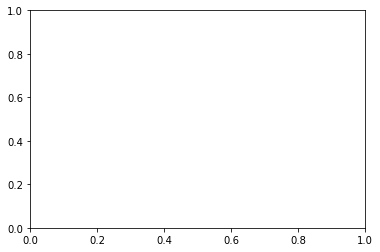

In [12]:
##### Calculate Cluster Cutoff #####

wcss = []
#print(fps)
a = int(nmol/4)+1
b = int(nmol/10)+1

for i in range(b, a):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(fps)
    print(i,' of ',a)
    wcss.append(kmeans.inertia_)
    if kmeans.inertia_ > 10*nmol:
        cut_off = i

cut_off = cut_off +1        
        
plt.plot(range(b, a), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print(cut_off, wcss)

In [ ]:
#print(fps)